# Laboratorio 1 - Práctica 3.
### Gonzalo de las Heras de Matías - Jorge de la Fuente Tagarro
## Principal Component Analysis.

![title](Images/usa.gif)

### Objetivo 

Existen casos en que las variables no se pueden representar visualmente debido a que necesitaríamos varias dimensiones para ello. Para evitar esto, existe una metodología la cual, un set de datos multidimensional,  podemos transformarlo para poder explicar gran parte de la información en 2 o 3 dimensiones. Dicha metodología se conoce con el nombre de Principal Component Analysis (PCA). Vamos a aplicarlo a un set de datos que está colgado en Moodle y vamos a dar una serie de explicaciones de que ocurre. 

El dataset contiene es un archivo csv con distintos atributos para cada atentado registrado.

#### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from matplotlib.pyplot import cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import linalg
warnings.filterwarnings('ignore')

## Ejercicio 1

#### Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de la librería scikitk-learn.

<font color='blue'>Cargamos el fichero de datos, eliminamos la columna referente a los estados para quedarnos solo con los valores numéricos y centramos los valores.</font>

In [2]:
# Carga del fichero de datos.
Dataset = pd.read_excel("Datos/PCA.xlsx", header=0) 

# Mostramos el dataset.
Dataset.head(12)

,State,Total Population,Net Domestic Migration,Civilian move from abroad,Net International Migration,Period Births,Period Deaths
0,Alabama,4464356,-1.78,-0.02,0.69,14.41,10.28
1,Alaska,634892,-1.72,-0.24,2.09,15.95,4.64
2,Arizona,5307331,14.25,-0.03,4.29,15.88,7.77
3,Arkansas,2692090,0.36,-0.01,1.07,14.35,10.51
4,California,34501130,-2.01,-0.04,7.88,15.37,6.72
5,Colorado,4417714,9.32,-0.06,3.57,14.57,6.26
6,Connecticut,3425074,-2.37,-0.02,3.50,12.52,9.00
7,Delaware,796165,5.39,-0.04,2.12,14.01,8.79
8,District of Columbia,571822,-7.77,-0.07,5.73,14.33,10.76
9,Florida,16396515,12.52,-0.03,5.76,12.54,10.13


In [3]:
# Guardado de la columna de estados.
Estados = pd.DataFrame()
Estados["nombre"] = Dataset["State"]

# Borrado de la columna de estados.
del Dataset['State']

# Centralización de los datos.
datos_centrados = StandardScaler().fit_transform(Dataset.values)

## Ejercicio 2

#### El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y los autovectores (eigenvectors) que nos permitan explicar cuantos componentes necesitamos para representar los datos iniciales. Para ello primer habrá que obtener la matriz de covarianza mediante el método cov de numpy y después aplicarle a dicha matriz el método linalg.eig también de numpy. Obten un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica que quieren decir estos datos.

<font color='blue'>Capturamos las componentes principales, los autovalores y autovectores.</font>

<font color='blue'>Con la libreria de numpy.</font>

In [4]:
# Calculamos la matriz de covarianza.
covarianza = np.cov(datos_centrados, rowvar = False)

# Calculamos los autovalores y los autovectores.
autovalores, autovectores = linalg.eigh(covarianza)

# Ordenamos los autovalores y los autovectores.
indice = np.argsort(autovalores)[::-1]
autovectores = autovectores[:, indice]
autovalores = autovalores[indice]

# Creamos el dataframe.
AutoValores_np = pd.DataFrame()

# Confeccionamos el dataframe con las columnas deseadas.
AutoValores_np["componente"] = ["comp_1", "comp_2", "comp_3", "comp_4", "comp_5", "comp_6"]
AutoValores_np["autovalor"] = autovalores

# Regla de 3 respecto al número de variables.
AutoValores_np["% varianza"] = (AutoValores_np["autovalor"] * 100) / 6
AutoValores_np["% acum"] = AutoValores_np["% varianza"].cumsum()

# Mostramos el dataframe.
AutoValores_np

,componente,autovalor,% varianza,% acum
0,comp_1,2.274435,37.907245,37.907245
1,comp_2,1.393388,23.223127,61.130372
2,comp_3,1.111548,18.525799,79.656171
3,comp_4,0.626345,10.439085,90.095256
4,comp_5,0.394775,6.579588,96.674843
5,comp_6,0.319509,5.325157,102.000000


<font color='blue'>Con la libreria de PCA (por el redondeo de tipos float, la libreria es más exacta a la hora de calcular.</font>

In [5]:
# Usamos la libreria de sklearn par proyectar los datos.
modelo_PCA = PCA(n_components=6)

# Capturamos las componentes principales.
componentes_principales = modelo_PCA.fit_transform(datos_centrados)

# Creamos el dataframe.
AutoValores = pd.DataFrame()

# Confeccionamos el dataframe con las columnas deseadas.
AutoValores["componente"] = ["comp_1", "comp_2", "comp_3", "comp_4", "comp_5", "comp_6"]
AutoValores["autovalor"] = modelo_PCA.explained_variance_
AutoValores["% varianza"] = modelo_PCA.explained_variance_ratio_ * 100
AutoValores["% acum"] = modelo_PCA.explained_variance_ratio_.cumsum() * 100

# Mostramos el dataframe.
AutoValores

,componente,autovalor,% varianza,% acum
0,comp_1,2.274435,37.163966,37.163966
1,comp_2,1.393388,22.767771,59.931737
2,comp_3,1.111548,18.162548,78.094285
3,comp_4,0.626345,10.234397,88.328682
4,comp_5,0.394775,6.450576,94.779258
5,comp_6,0.319509,5.220742,100.000000


<font color='blue'>Observamos que:
    <br>
    <ul>
        <li>Con la comp_1 representamos el 37.1% del patrón.</li>
        <li>Con la comp_2 representamos el 22.7% del patrón, junto a la anterior componente representamos el 59.9% del patrón</li>
        <li>Con la comp_3 representamos el 18.1% del patrón, junto a las anteriores componentes representamos el 78.0% del patrón.</li>
        <li>Con la comp_4 representamos el 10.2% del patrón, junto a las anteriores componentes representamos el 88.3% del patrón.</li>
        <li>Con la comp_4 representamos el  6.4% del patrón, junto a las anteriores componentes representamos el 94.7% del patrón.</li>
        <li>Con la comp_5 representamos el  5.2% del patrón, junto a las anteriores componentes representamos el 100.% del patrón.</li>
    </ul>
</font>

## Ejercicio 3

#### Por último queremos representar gráficamente los individuos de nuestro dataset pero usando los valores de los componentes principales obtenidas. Obtén un diagrama de dispersión en 2 dimensiones y comenta que has interpretado en él.

<font color='blue'>Creamos el dataframe con las distintas componentes. Empleamos la libreria de PCA de sklearn debido al problema del redondeo como hemos comentado antes. Para hacerlo con los autovectores calculados con la libreria de numpy, tendriamos que usar la matriz traspuesta: autovectores.T</font>

In [6]:
# Creamos el dataframe con los autovalores.
Componentes = pd.DataFrame(modelo_PCA.components_ ,columns=Dataset.keys())

# Añadimos la característica.
Componentes["componentes"] = ["comp_1", "comp_2", "comp_3", "comp_4", "comp_5", "comp_6"] 

# Mostramos el dataframe.
Componentes

,Total Population,Net Domestic Migration,Civilian move from abroad,Net International Migration,Period Births,Period Deaths,componentes
0,0.326413,0.145422,-0.326732,0.506363,0.471164,-0.535868,comp_1
1,-0.632376,-0.093329,-0.570093,-0.397401,0.212780,-0.251359,comp_2
2,-0.265517,0.896224,0.078631,0.052648,-0.294214,-0.175402,comp_3
3,-0.132939,0.110223,0.648810,-0.298119,0.662657,-0.145722,comp_4
4,-0.141069,-0.362440,0.340322,0.049018,-0.440271,-0.732582,comp_5
5,-0.620872,-0.153011,0.159010,0.701156,0.114953,0.246957,comp_6


<font color='blue'>Para representar el dataset en 2 dimensiones solo necesitamos las dos primeras componentes.</font>

<font color='blue'>La componente comp_1 indica:
    <br>
    <ul>
        <li>Las variables 'Period Deaths' y 'Net International Migration' al ser en valor absoluto las de mayor cantidad, son las características que más influyen en esta componente.</li>
          <ul>
                <li>'Period Deaths' al ser negativo influye negativamente, es decir, cuanto menos cantidad.</li>
        <li>'Net International Migration' al ser positivo influye positivamente, es decir, cuanto más cantidad.</li>
                </ul>
<li>Por el contrario, 'Net Domestic Migration' es la que menos influye al ser el menor valor, en valor absoluto.</li>
    </ul>
</font>

<font color='blue'>La componente comp_2 indica:
    <br>
    <ul>
        <li>La variable 'Total Population' al ser en valor absoluto la de mayor cantidad, es la característica que más infliye en esta componente.</li>
            <ul>
        <li>'Total Population' al ser positivo influye positivamente, es decir, cuanto más cantidad.</li>
                </ul>
<li>Por el contrario, 'Net Domestic Migration' es la que menos influye al ser el menor valor, en valor absoluto.</li>
    </ul>
</font>

<font color='blue'>Para calcular la proyección en cada dimensión de cada patrón, calculamos el sumatorio de la multiplicación de cada valor por la componente. Hacemos un ejemplo con la componente 1 y el primer registro del dataset.</font>

In [7]:
# Variables.
acumulado = 0
valores = datos_centrados[0]
componente_1 = Componentes.iloc[0]
print("Componente 1: \n")
print(componente_1)
i=0

# Sumatorio de la multiplicación de cada componente con cada variable.
for valor in valores:
    acumulado += valor * componente_1[i]
    i+=1
    
print("\nProyección 1: " + str(acumulado))

Componente 1: 

Total Population               0.326413
Net Domestic Migration         0.145422
Civilian move from abroad     -0.326732
Net International Migration    0.506363
Period Births                  0.471164
Period Deaths                 -0.535868
componentes                      comp_1
Name: 0, dtype: object

Proyección 1: -1.1894273093328431


<font color='blue'>Habría que calcular para cada registro, su proyección.</font>

<font color='blue'>La libreria PCA nos proporciona ya las componentes calculadas de cada registro.</font>

In [8]:
# Creamos el dataframe con las componentes principales calculadas para cada registro.
Componentes_Principales = pd.DataFrame(data=componentes_principales, columns=["comp_1", "comp_2", "comp_3",
                                                                              "comp_4", "comp_5", "comp_6"])
# Añadimos la columna con el nombre del estado.
Componentes_Principales["estado"] = Estados["nombre"]

# Mostramos el dataframe.
Componentes_Principales.head(10)

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,estado
0,-1.189427,0.078246,-0.526890,0.602713,-0.736593,-0.150520,Alabama
1,2.909501,3.663137,-0.173503,-0.931222,0.636790,-0.787041,Alaska
2,1.609022,-0.246804,1.692072,0.984550,-0.612221,0.373891,Arizona
3,-1.299644,-0.003577,-0.164837,0.684678,-0.845151,0.187450,Arkansas
4,4.099445,-3.532106,-1.379766,-0.677760,0.307037,-1.092108,California
5,1.669286,0.487463,1.438153,0.341347,0.604915,-0.141485,Colorado
6,-0.516061,-0.404299,0.005988,-0.424923,0.557454,0.663026,Connecticut
7,-0.254278,0.480146,0.839449,0.337760,-0.222955,0.240183,Delaware
8,-0.071416,-0.094366,-1.121775,-0.882105,-0.742052,2.197604,District of Columbia
9,0.718970,-2.510599,1.302755,-1.052498,-1.135604,0.053199,Florida


<font color='blue'>Ahora gracias a las PCA hemos conseguido proyectar los datos en menos dimensiones. Podemos emplear 2 para representarlo en 2 dimensiones y, gracias al porcentaje de varianza acumulado anteriormente, sabemos que representamos los patrones con casi el 60% de completitud.</font>

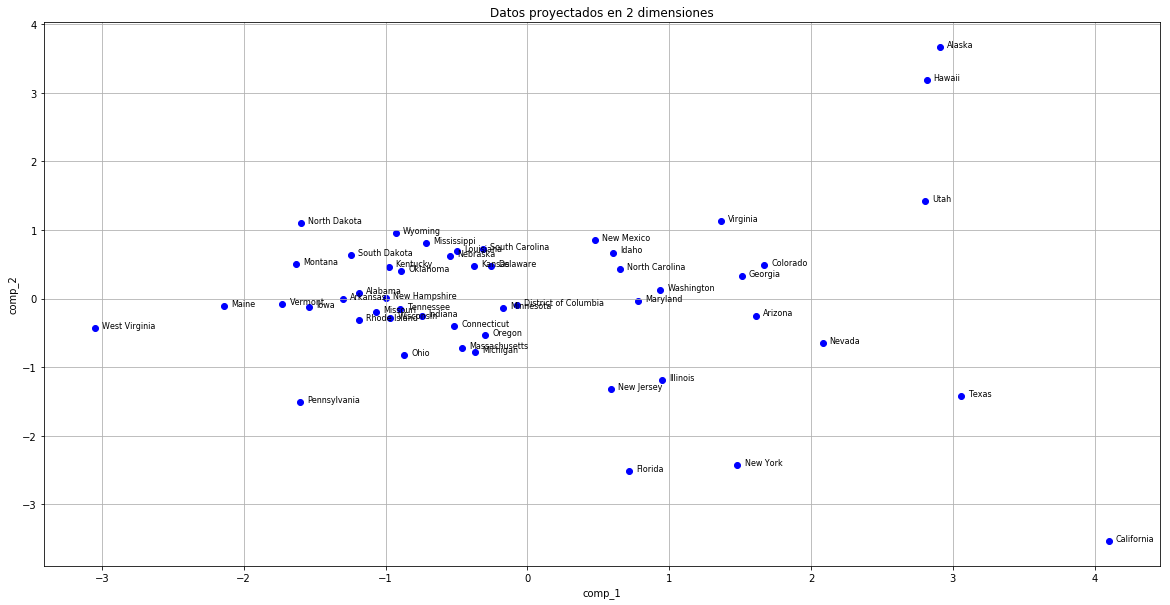

In [9]:
# Preparamos la gráfica.
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(Componentes_Principales["comp_1"], Componentes_Principales["comp_2"], c="b")
for i, txt in enumerate(Componentes_Principales["estado"]):
    pos = (Componentes_Principales["comp_1"][i] + 0.05, Componentes_Principales["comp_2"][i])
    ax.annotate(txt, (Componentes_Principales["comp_1"][i], Componentes_Principales["comp_2"][i]), pos, 'data', \
                size=8)
plt.grid(True)
plt.xlabel('comp_1')
plt.ylabel('comp_2')
plt.title('Datos proyectados en 2 dimensiones')
plt.show()

<font color='blue'>En la componente 2 la población es la variable que más influye (y negativamente, cuanto menos). Por ello podemos ver en la componente 2 cómo Alaska (634892) y Hawaii (1224398) están juntos en el eje Y porque tienen poca población  y California (34501130) está más abajo porque es el estado con más población.
<br>    <br>
    En la componente 1 'Period Deaths' bajos y 'Net International Migration' altos son los que más influyen. Por ello podemos ver en la componente 1 los estados que están juntos en el eje X porque tienen poco 'Period Deaths' y 'Net International Migration' altos.
<br>
Un ejemplo son Colorado y Georgia que están cerca pues tienen de 'Net International Migration' 3.57 y 2.71 y de 'Period Deaths' 6.26 y 7.75 respectivamente.
</font>